<a href="https://colab.research.google.com/github/Jiacheng1216/Tensorflow2.0/blob/master/LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
c = tf.constant(1)
v = tf.Variable(1)
print(c)
print(v)

tf.Tensor(1, shape=(), dtype=int32)
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>


In [ ]:
import tensorflow as tf
x = tf.constant(4)
print(x) 
print("{} 階Tensor".format(x.ndim)) 

tf.Tensor(4, shape=(), dtype=int32)
0 階Tensor


In [ ]:
x = tf.constant([1, 2, 3, 4, 5, 6]) 
print("{}階Tensor ".format(x.ndim))

1階Tensor 


In [ ]:
x = tf.constant([[1, 2, 3], [4, 5, 6]])
print("{}階Tensor ".format(x.ndim))

2階Tensor 


In [ ]:
import numpy as np
import tensorflow as tf

print("Eager Execution 是否啟動: {}".format(tf.executing_eagerly()))

Eager Execution 是否啟動: True


In [ ]:
a = tf.constant(3)
b = tf.constant(4)
print("a = {}".format(a))
print("b = {}".format(b))

a = 3
b = 4


In [ ]:
print(a)
print(b)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [ ]:
c = a + b
print("a + b = {}".format(c))
d = a * b
print("a * b = {}".format(d))

a + b = 7
a * b = 12


In [ ]:
a = tf.constant([[1., 2.], [3., 4.]], dtype=tf.float32)
b = np.array([[1., 0.], [2., 3.]], dtype=np.float32)
print("a constant: {}D Tensor".format(a.ndim))

c = a + b
print("a + b = \n{}".format(c))
d = tf.matmul(a, b)
print("a * b = \n{}".format(d))

a constant: 2D Tensor
a + b = 
[[2. 2.]
 [5. 7.]]
a * b = 
[[ 5.  6.]
 [11. 12.]]


In [ ]:
print(c)
print("NumpyArray:\n {}".format(c.numpy()))

tf.Tensor(
[[2. 2.]
 [5. 7.]], shape=(2, 2), dtype=float32)
NumpyArray:
 [[2. 2.]
 [5. 7.]]


In [ ]:
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
    loss = w * w

grad = tape.gradient(loss, w)
print(grad)

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [ ]:
model = keras.Sequential(name='Sequential')
model.add(layers.Dense(64, activation='relu', input_shape=(784,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model = tf.keras.Sequential([layers.Dense(64, activation='relu', input_shape=(784,)),
                             layers.Dense(64, activation='relu'), 
                             layers.Dense(10, activation='softmax')])

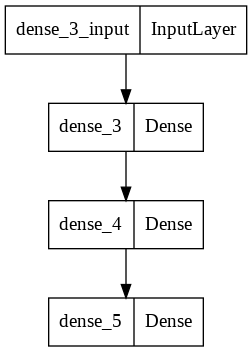

In [ ]:
plot_model(model, to_file='Sequential_Model.png')

Image('Sequential_Model.png')

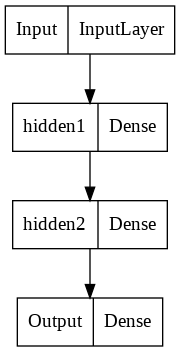

In [ ]:
inputs = keras.Input(shape=(784,), name='Input')
hidden1 = layers.Dense(64, activation='relu', name='hidden1')(inputs)
hidden2 = layers.Dense(64, activation='relu', name='hidden2')(hidden1)
outputs = layers.Dense(10, activation='softmax', name='Output')(hidden2)

model = keras.Model(inputs=inputs, outputs=outputs)

plot_model(model, to_file='Functional_API_Sample_Model.png')

Image('Functional_API_Sample_Model.png')

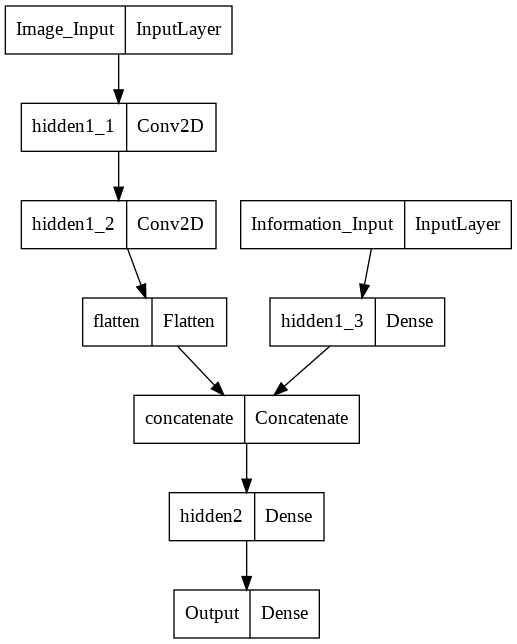

In [ ]:
img_input = keras.Input(shape=(28, 28, 1), name='Image_Input')
info_input = keras.Input(shape=(1, ), name='Information_Input')

hidden1_1 = layers.Conv2D(64, kernel_size=5, strides=2, activation='relu', name='hidden1_1')(img_input)
hidden1_2 = layers.Conv2D(32, kernel_size=5, strides=2, activation='relu', name='hidden1_2')(hidden1_1)
hidden1_2_ft= layers.Flatten()(hidden1_2)
hidden1_3 = layers.Dense(64, activation='relu', name='hidden1_3')(info_input)
concat = layers.Concatenate()([hidden1_2_ft, hidden1_3])
hidden2 = layers.Dense(64, activation='relu', name='hidden2')(concat)
outputs = layers.Dense(1, name='Output')(hidden2)

model = keras.Model(inputs=[img_input, info_input], outputs=outputs)

plot_model(model, to_file='Functional_API_Multi_Input_Model.png')

Image('Functional_API_Multi_Input_Model.png')

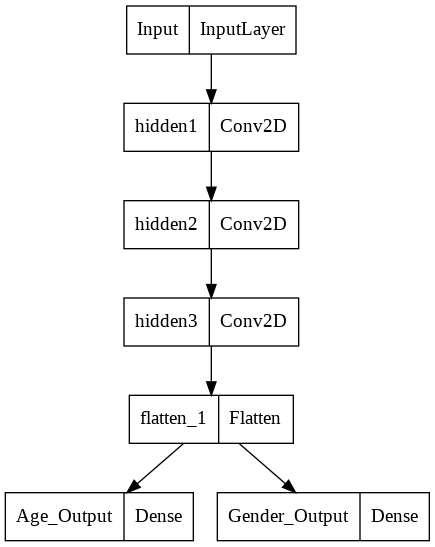

In [ ]:
inputs = keras.Input(shape=(28, 28, 1), name='Input')

hidden1 = layers.Conv2D(64, kernel_size=3, activation='relu', name='hidden1')(inputs)
hidden2 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden2')(hidden1)
hidden3 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden3')(hidden2)
flatten = layers.Flatten()(hidden3)

age_output = layers.Dense(1, name='Age_Output')(flatten)
gender_output = layers.Dense(1, name='Gender_Output')(flatten)

model = keras.Model(inputs=inputs, outputs=[age_output, gender_output])

plot_model(model, to_file='Functional_API_Multi_Output_Model.png')

Image('Functional_API_Multi_Output_Model.png')

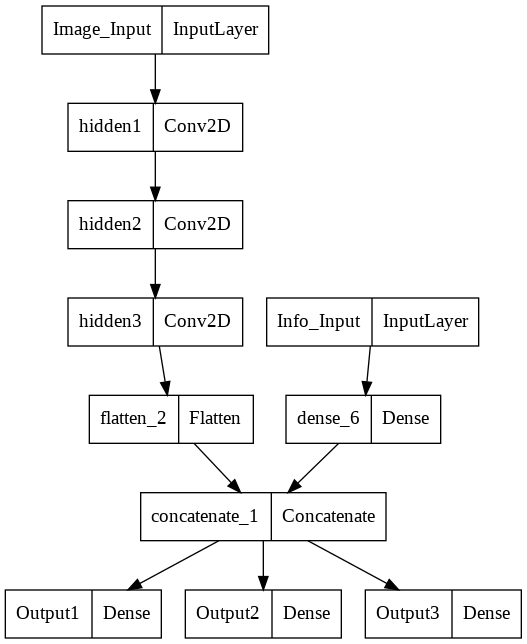

In [ ]:
image_inputs = keras.Input(shape=(28, 28, 1), name='Image_Input')
hidden1 = layers.Conv2D(64, kernel_size=3, activation='relu', name='hidden1')(image_inputs)
hidden2 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden2')(hidden1)
hidden3 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden3')(hidden2)
flatten = layers.Flatten()(hidden3)

info_inputs = keras.Input(shape=(10, ), name='Info_Input')
hidden4 = layers.Dense(64)(info_inputs)

concat = layers.Concatenate()([flatten, hidden4])

weather_outputs = layers.Dense(1, name='Output1')(concat)
temp_outputs = layers.Dense(1, name='Output2')(concat)
humidity_outputs = layers.Dense(1, name='Output3')(concat)

model = keras.Model(inputs=[image_inputs, info_inputs], 
                    outputs=[weather_outputs, temp_outputs, humidity_outputs])

plot_model(model, to_file='Functional_API_Multi_Input_Multi_Output_Model.png')

Image('Functional_API_Multi_Input_Multi_Output_Model.png')

In [ ]:
dataset = tf.data.Dataset.from_tensors(tf.constant([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], shape=(10, )))
print(dataset)

<TensorDataset shapes: (10,), types: tf.int32>


In [ ]:
x_data = tf.data.Dataset.from_tensor_slices(tf.constant([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], shape=(10, )))
print(x_data)

y_data = tf.data.Dataset.from_tensor_slices(tf.constant([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], shape=(10, )))
print(y_data)

<TensorSliceDataset shapes: (), types: tf.int32>
<TensorSliceDataset shapes: (), types: tf.int32>


In [ ]:
for data in dataset:
    print(data)

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int32)


In [ ]:
for data1, data2 in zip(x_data, y_data):
    print('x: {}, y: {}'.format(data1, data2))

x: 0, y: 0
x: 1, y: 2
x: 2, y: 4
x: 3, y: 6
x: 4, y: 8
x: 5, y: 10
x: 6, y: 12
x: 7, y: 14
x: 8, y: 16
x: 9, y: 18


In [ ]:
for data in dataset:
    print(data)

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int32)


In [ ]:
for data1, data2 in zip(x_data.take(5), y_data.take(5)):
    print('x: {}, y: {}'.format(data1, data2))

x: 0, y: 0
x: 1, y: 2
x: 2, y: 4
x: 3, y: 6
x: 4, y: 8


In [ ]:
for data1, data2 in zip(x_data.take(12), y_data.take(12)):
    print('x: {}, y: {}'.format(data1, data2))

x: 0, y: 0
x: 1, y: 2
x: 2, y: 4
x: 3, y: 6
x: 4, y: 8
x: 5, y: 10
x: 6, y: 12
x: 7, y: 14
x: 8, y: 16
x: 9, y: 18


In [ ]:
dataset = tf.data.Dataset.zip((x_data, y_data))
print(dataset)

<ZipDataset shapes: ((), ()), types: (tf.int32, tf.int32)>


In [ ]:
tf.data.Dataset.range(10).map(lambda x: x*2)

<MapDataset shapes: (), types: tf.int64>

In [ ]:
x = tf.data.Dataset.range(10)
y = tf.data.Dataset.range(10).map(lambda x: x*2)

dataset = tf.data.Dataset.zip({"x": x, "y": y})
print(dataset)

<ZipDataset shapes: {x: (), y: ()}, types: {x: tf.int64, y: tf.int64}>


In [ ]:
for data in dataset.take(10):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: 0, y: 0
x: 1, y: 2
x: 2, y: 4
x: 3, y: 6
x: 4, y: 8
x: 5, y: 10
x: 6, y: 12
x: 7, y: 14
x: 8, y: 16
x: 9, y: 18


In [ ]:
dataset = tf.data.Dataset.zip({"x": x, "y": y}).batch(2)

for data in dataset.take(5):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: [0 1], y: [0 2]
x: [2 3], y: [4 6]
x: [4 5], y: [ 8 10]
x: [6 7], y: [12 14]
x: [8 9], y: [16 18]


In [ ]:
dataset = dataset.shuffle(10)
for data in dataset.take(5):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: [2 3], y: [4 6]
x: [4 5], y: [ 8 10]
x: [8 9], y: [16 18]
x: [0 1], y: [0 2]
x: [6 7], y: [12 14]


In [ ]:
for data in dataset.take(10):
    print('x: {}, y: {}'.format(data['x'], data['y']))

    
print('-' * 50)
dataset = dataset.repeat(2)
for data in dataset.take(10):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: [8 9], y: [16 18]
x: [2 3], y: [4 6]
x: [0 1], y: [0 2]
x: [6 7], y: [12 14]
x: [4 5], y: [ 8 10]
--------------------------------------------------
x: [4 5], y: [ 8 10]
x: [6 7], y: [12 14]
x: [2 3], y: [4 6]
x: [0 1], y: [0 2]
x: [8 9], y: [16 18]
x: [4 5], y: [ 8 10]
x: [2 3], y: [4 6]
x: [0 1], y: [0 2]
x: [6 7], y: [12 14]
x: [8 9], y: [16 18]
